In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(df.shape)
print(df.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [4]:
missing = df.isnull().sum()
missing = missing[missing>0]
missing= missing.sort_values(ascending=False)
missing.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


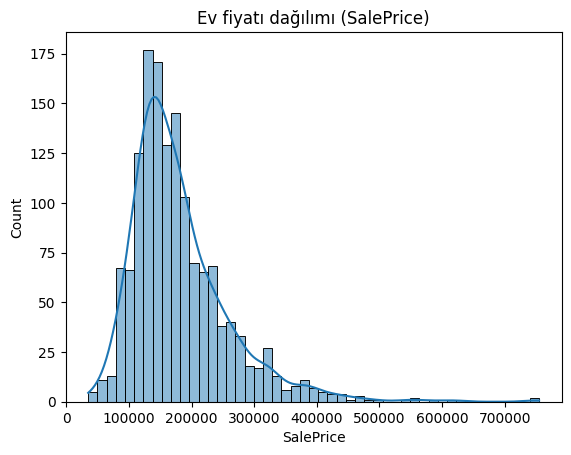

In [6]:
sns.histplot(df["SalePrice"],kde=True)
plt.title("Ev fiyatı dağılımı (SalePrice)")
plt.show()

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


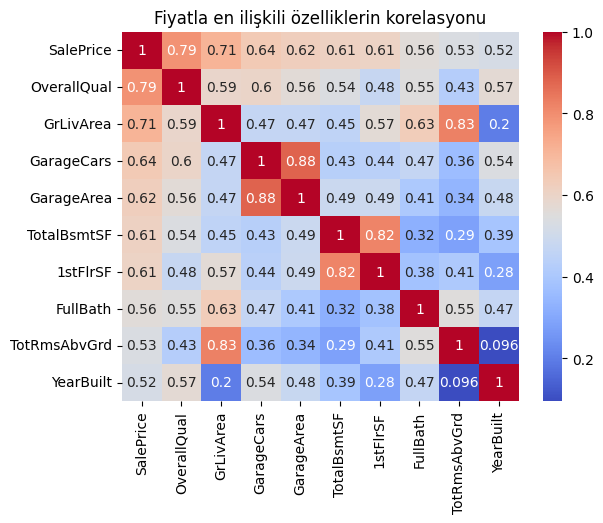

In [7]:
corr = df.corr(numeric_only=True)
top_corr=corr["SalePrice"].sort_values(ascending=False).head(10)
print(top_corr)
sns.heatmap(df[top_corr.index].corr(),annot=True, cmap="coolwarm")
plt.title("Fiyatla en ilişkili özelliklerin korelasyonu")
plt.show()

In [8]:
df.columns[df.isnull().any()]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
for col in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu",
            "GarageType","GarageFinish","GarageQual","GarageCond",
            "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","MasVnrType"]:
    df[col] = df[col].fillna("None")
df=df.fillna(0) 

In [10]:
#.isnull ile bol hücreleri t/f olarak işaretlemesi yapıldı
#.sum.sum ile sütunlardaki boş hücrelerin sayısını aldık
df.isnull().sum().sum()

np.int64(0)

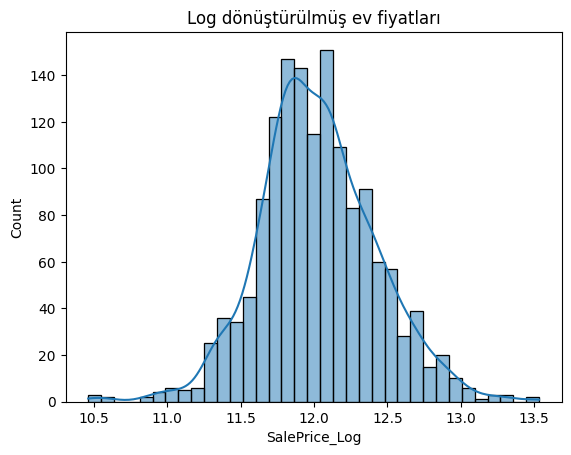

In [11]:
df["SalePrice_Log"] = np.log1p(df["SalePrice"])
sns.histplot(df["SalePrice_Log"],kde=True)
plt.title("Log dönüştürülmüş ev fiyatları")
plt.show()


In [12]:
# Yalnızca mevcut sütunlara göre fazlalıkları kaldır
df = df.drop(["TotalBsmtSF"], axis=1, errors="ignore")


In [13]:
df.shape


(1460, 81)

In [14]:
numeric_features= df.select_dtypes(include=[np.number]).columns
categorical_features= df.select_dtypes(exclude=[np.number]).columns

print("sayısal sütun sayısı", len(numeric_features))
print("ketegorik sütun sayısı" , len(categorical_features))

sayısal sütun sayısı 38
ketegorik sütun sayısı 43


In [15]:
from sklearn.model_selection import train_test_split
#df.drop ile (saleprice ve saleprice_log değerini çıkarmamızın sebebi 
# evin özelliklerine bakarak fiyatını tahmin edemezdi, 
# hedef modelin öğrenmesi için doğru fonksiyonu girmek)
x = df.drop(["SalePrice", "SalePrice_Log"],axis=1)
#eğer y değeri(çıktı değeri olarak grilivarea'yı hedef alırsak model bildiğimiz bir şeyi tahmin etmeye çalışır
#bu da nedensellik hatasına yol açardı.
#SalesPrice_Log değeriyle modelimiz mutlak farkı yerine oransal değişimini bağımsız şekilde öğrenecek.)
y= df["SalePrice_Log"]

x_train, x_test , y_train ,y_test = train_test_split(
    x,y, test_size= 0.2, random_state=42
)
print("Egitim test boyutu",x_train.shape)
print("Test veri boyut",x_test.shape)


Egitim test boyutu (1168, 79)
Test veri boyut (292, 79)


In [35]:


from sklearn.preprocessing import StandardScaler, OneHotEncoder
# standartscaler ile veriye normalization uyguluyoruz,
# ölçek farkı yüzünden modelin yanlış öğrenmemesi için
# onehotencoder ile verileri 0-1 vektörlere çevirme işlemi uyguluyoruz,
# veriyi ön işleme sokuyoruz ki model oransal öğrenme yapsın.
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np


# Sayısal ve kategorik sütunları doğrudan X_train'den seçiyoruz
numeric_features = x_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = x_train.select_dtypes(exclude=["int64", "float64"]).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Preprocessor: sayısal verilere StandardScaler, kategorik verilere OneHotEncoder uygulanıyor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

#bu satırla birlikte karışık tipteki sutunu stringe çevirmemize yarıyor.
#YearBuilt → [2005, "2006", 2007, "2008"] yani bu formatı tek tipe çeviriyor. 
x_train = x_train.apply(lambda col: col.astype(str) if col.dtype == "object" or col.dtype == "int64" and col.nunique() < 50 else col)
x_test = x_test.apply(lambda col: col.astype(str) if col.dtype == "object" or col.dtype == "int64" and col.nunique() < 50 else col)

#.fit_transform ile veriyi yapısına göre kalibre ederiz StandardScaler için ortalama ve sapmasını öğrenir &
#OneHotEncoder için hangi etiketleri içerdiğini kaydeder
x_train_processed = preprocessor.fit_transform(x_train)

# Test verisini aynı kurallarla dönüştürüyoruz (fit değil transform!)
x_test_processed = preprocessor.transform(x_test)

# İşlenmiş verilerin boyutlarını kontrol ediyoruz
print("Eğitim verisi (işlenmiş):", x_train_processed.shape)
print("Test verisi (işlenmiş):", x_test_processed.shape)


Eğitim verisi (işlenmiş): (1168, 444)
Test verisi (işlenmiş): (292, 444)


In [36]:
from sklearn.linear_model import LinearRegression
#linearregresision elimizdeki feature'lerin fiyata(salesprice'ye) olan katkısını anlamaya çalışır
model = LinearRegression()
model.fit(x_train_processed, y_train)
print("Model egitimi tamam")


Model egitimi tamam


In [40]:
#r2_score kütüphanesi: modelin tahmin gücü için
#meanerror kütüphanesi: tahmin hataların ortalamasını hesaplama,model skoru için.. 
from sklearn.metrics import r2_score, mean_squared_error
#model.predict ile eğitilmiş modelin tahmin üretme fonksiyonunu ölçeriz
y_pred = model.predict(x_test_processed)


In [ ]:
r2= r2_score(y_test, y_pred)
mse = mean_squared_error (y_test, y_pred)
#sürüm hatasından dolayı karekökünü böyle alıyoruz. sürüm sebebiyle squared hatası veriyor
rmse= mse ** 0.5
print("R2 skoru:",round(r2,4))
print("Rmse:",round(rmse,4))


R2 skoru: 0.9032
Rmse: 0.1344


In [ ]:
feature_names = preprocessor.get_feature_names_out()
coefficients = model.coef_
importance = pd.DataFrame({
    "Feature": feature_names,
    "coefficient" : coefficients
}).sort_values(by="coefficient",ascending=False)
#en etkili 10 özelliği listeleme
importance.head(10)



,Feature,coefficient
259,cat__LowQualFinSF_513,0.854845
378,cat__PoolArea_738,0.742748
268,cat__BsmtFullBath_3,0.333313
98,cat__Condition2_PosA,0.313710
359,cat__3SsnPorch_153,0.232815
142,cat__RoofMatl_CompShg,0.209208
146,cat__RoofMatl_WdShake,0.192589
111,cat__HouseStyle_2.5Fin,0.190787
436,cat__SaleType_Oth,0.185706
144,cat__RoofMatl_Roll,0.182006


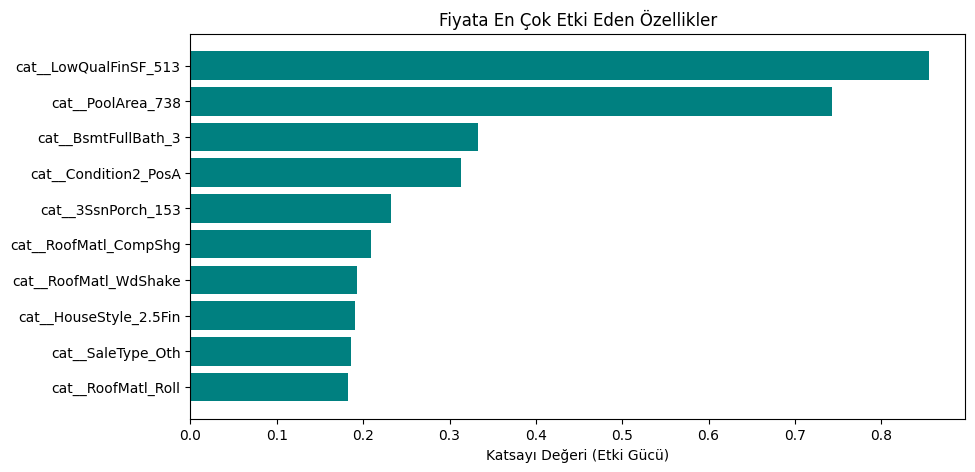

In [51]:
top_features = importance.head(10)
plt.figure(figsize=(10,5))
plt.barh(top_features["Feature"], top_features["coefficient"], color="teal")
plt.gca().invert_yaxis()
plt.title("Fiyata En Çok Etki Eden Özellikler")
plt.xlabel("Katsayı Değeri (Etki Gücü)")
plt.show()